In [1]:
#data imports
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\bryan\Desktop\New_Data_Science_Class\churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
len(df)

7032

In [5]:
#drop customer_id

df.drop('customerID',axis=1,inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#calculate missing values

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

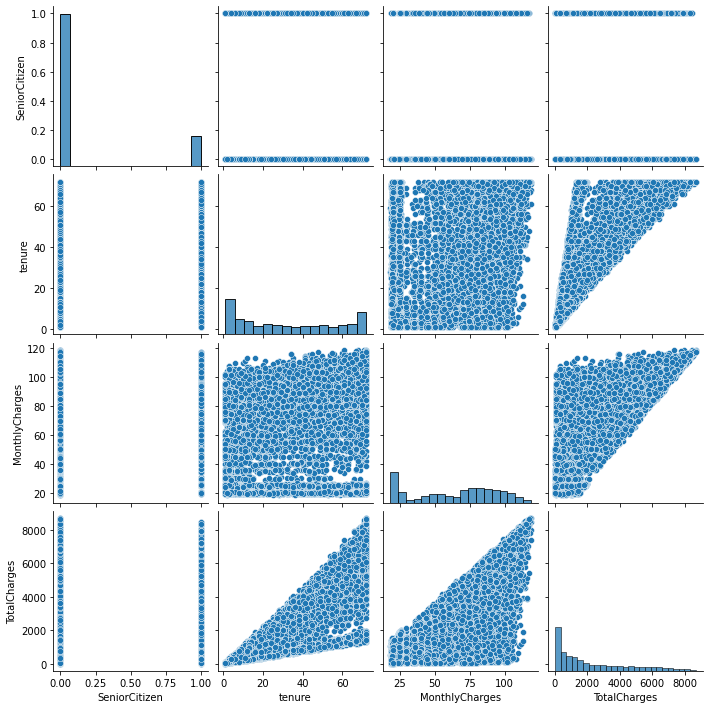

In [8]:
sns.pairplot(df)

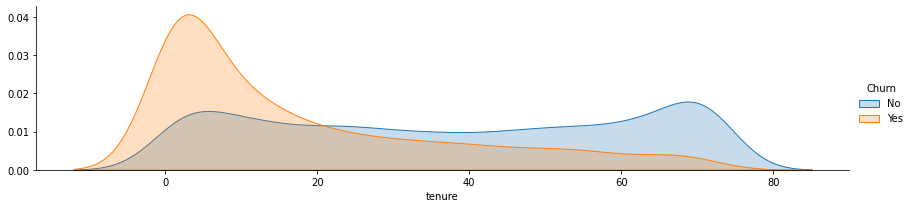

In [9]:
fig = sns.FacetGrid(data=df, hue='Churn',aspect=4)
fig.map(sns.kdeplot,'tenure',shade=True)
fig.add_legend()

In [10]:
#get dummies for string values

df_fin = pd.get_dummies(df, drop_first=True)

In [11]:
df_fin.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [12]:
corr = df_fin.corrwith(df_fin['Churn_Yes']).sort_values()

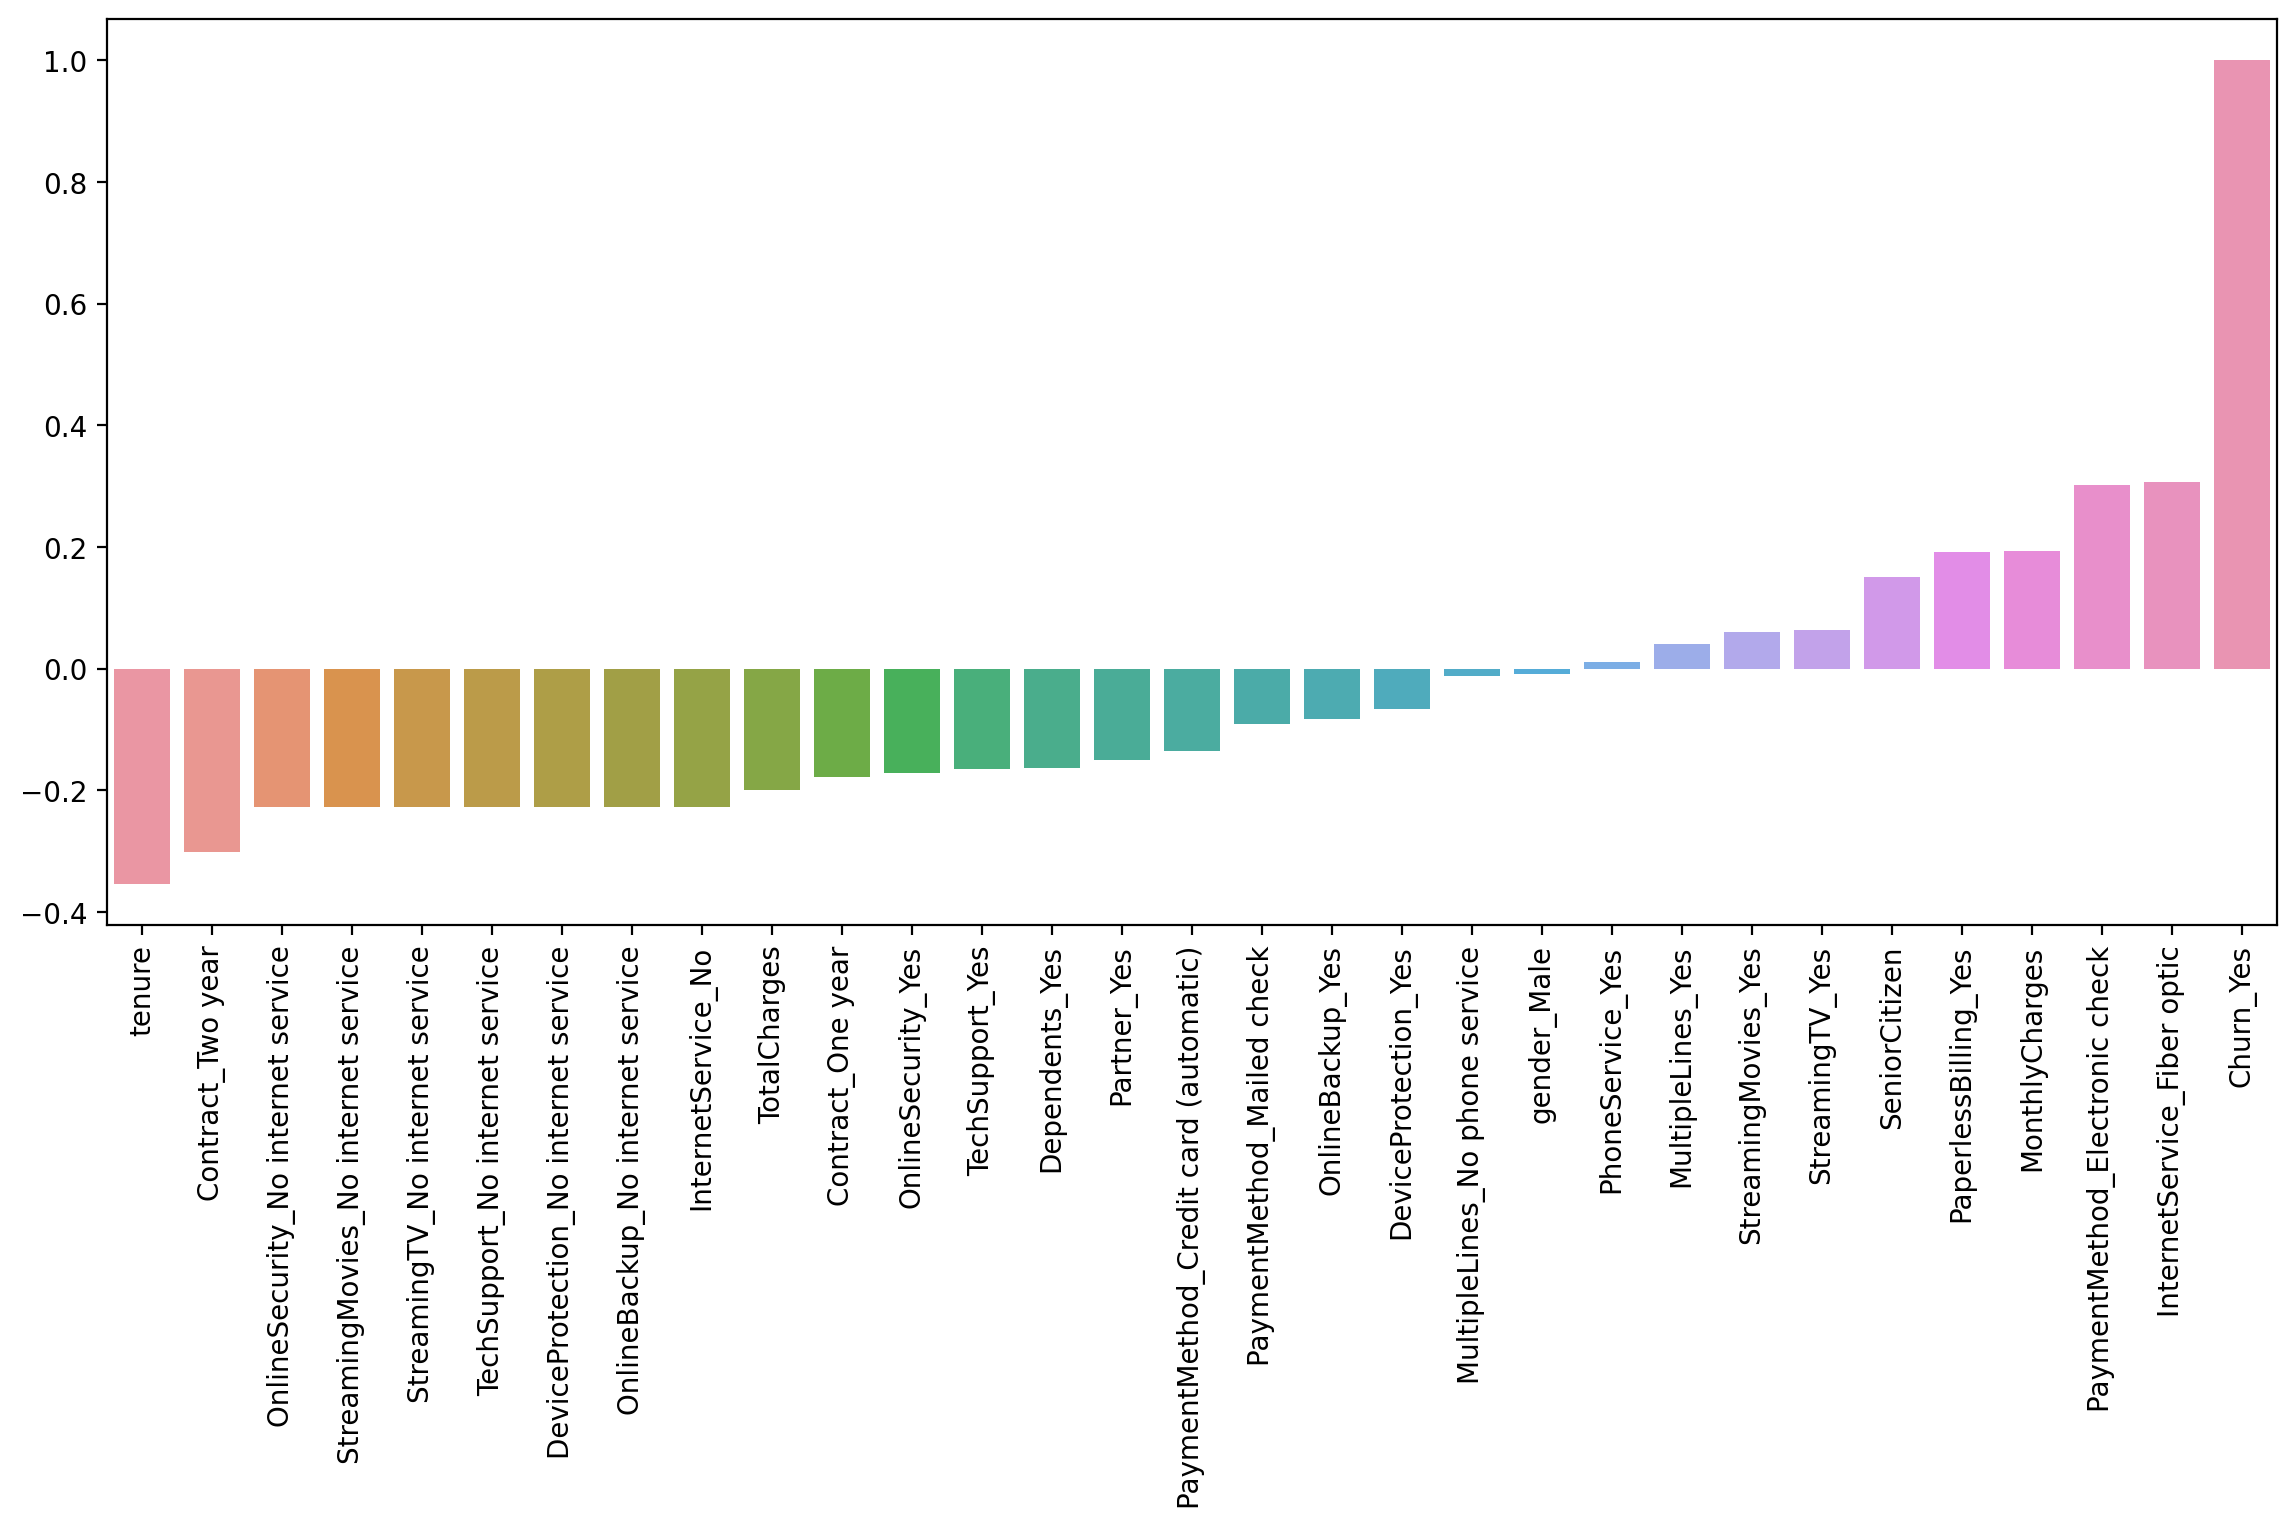

In [13]:
#plot correlation with target value (Churn_Yes)

plt.figure(figsize=(14,6),dpi=200)
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90);

C:\Users\bryan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn_Yes', ylabel='count'>

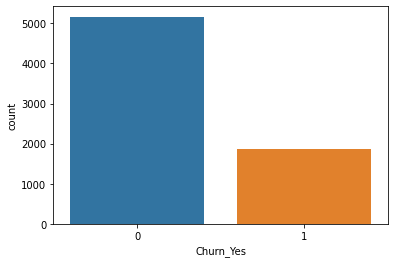

In [14]:
sns.countplot(df_fin['Churn_Yes'])

In [15]:
X = df_fin.drop('Churn_Yes',axis=1)

In [16]:
y = df_fin['Churn_Yes']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Gradient Boost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {'n_estimators':[50, 100, 150],
             'learning_rate':[0.1, 0.05, 0.2, 0.3, 0.4, 0.5],
             'max_depth':[3, 4, 5, 6, 7]}

In [22]:
gb_model = GradientBoostingClassifier()

In [23]:
grid = GridSearchCV(gb_model, param_grid)

In [24]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 100, 150]})

In [25]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [26]:
predictions = grid.predict(X_test)

In [27]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1697
           1       0.65      0.53      0.58       624

    accuracy                           0.80      2321
   macro avg       0.74      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



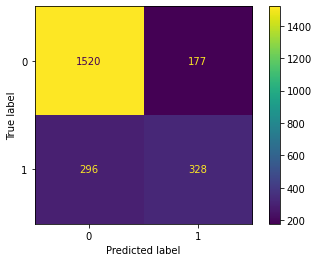

In [29]:
plot_confusion_matrix(grid, X_test, y_test)

In [30]:
feat_import = grid.best_estimator_.feature_importances_

In [31]:
imp_feat = pd.DataFrame(index=X.columns,
                       data=feat_import,
                       columns=['Importance']).sort_values(by='Importance')

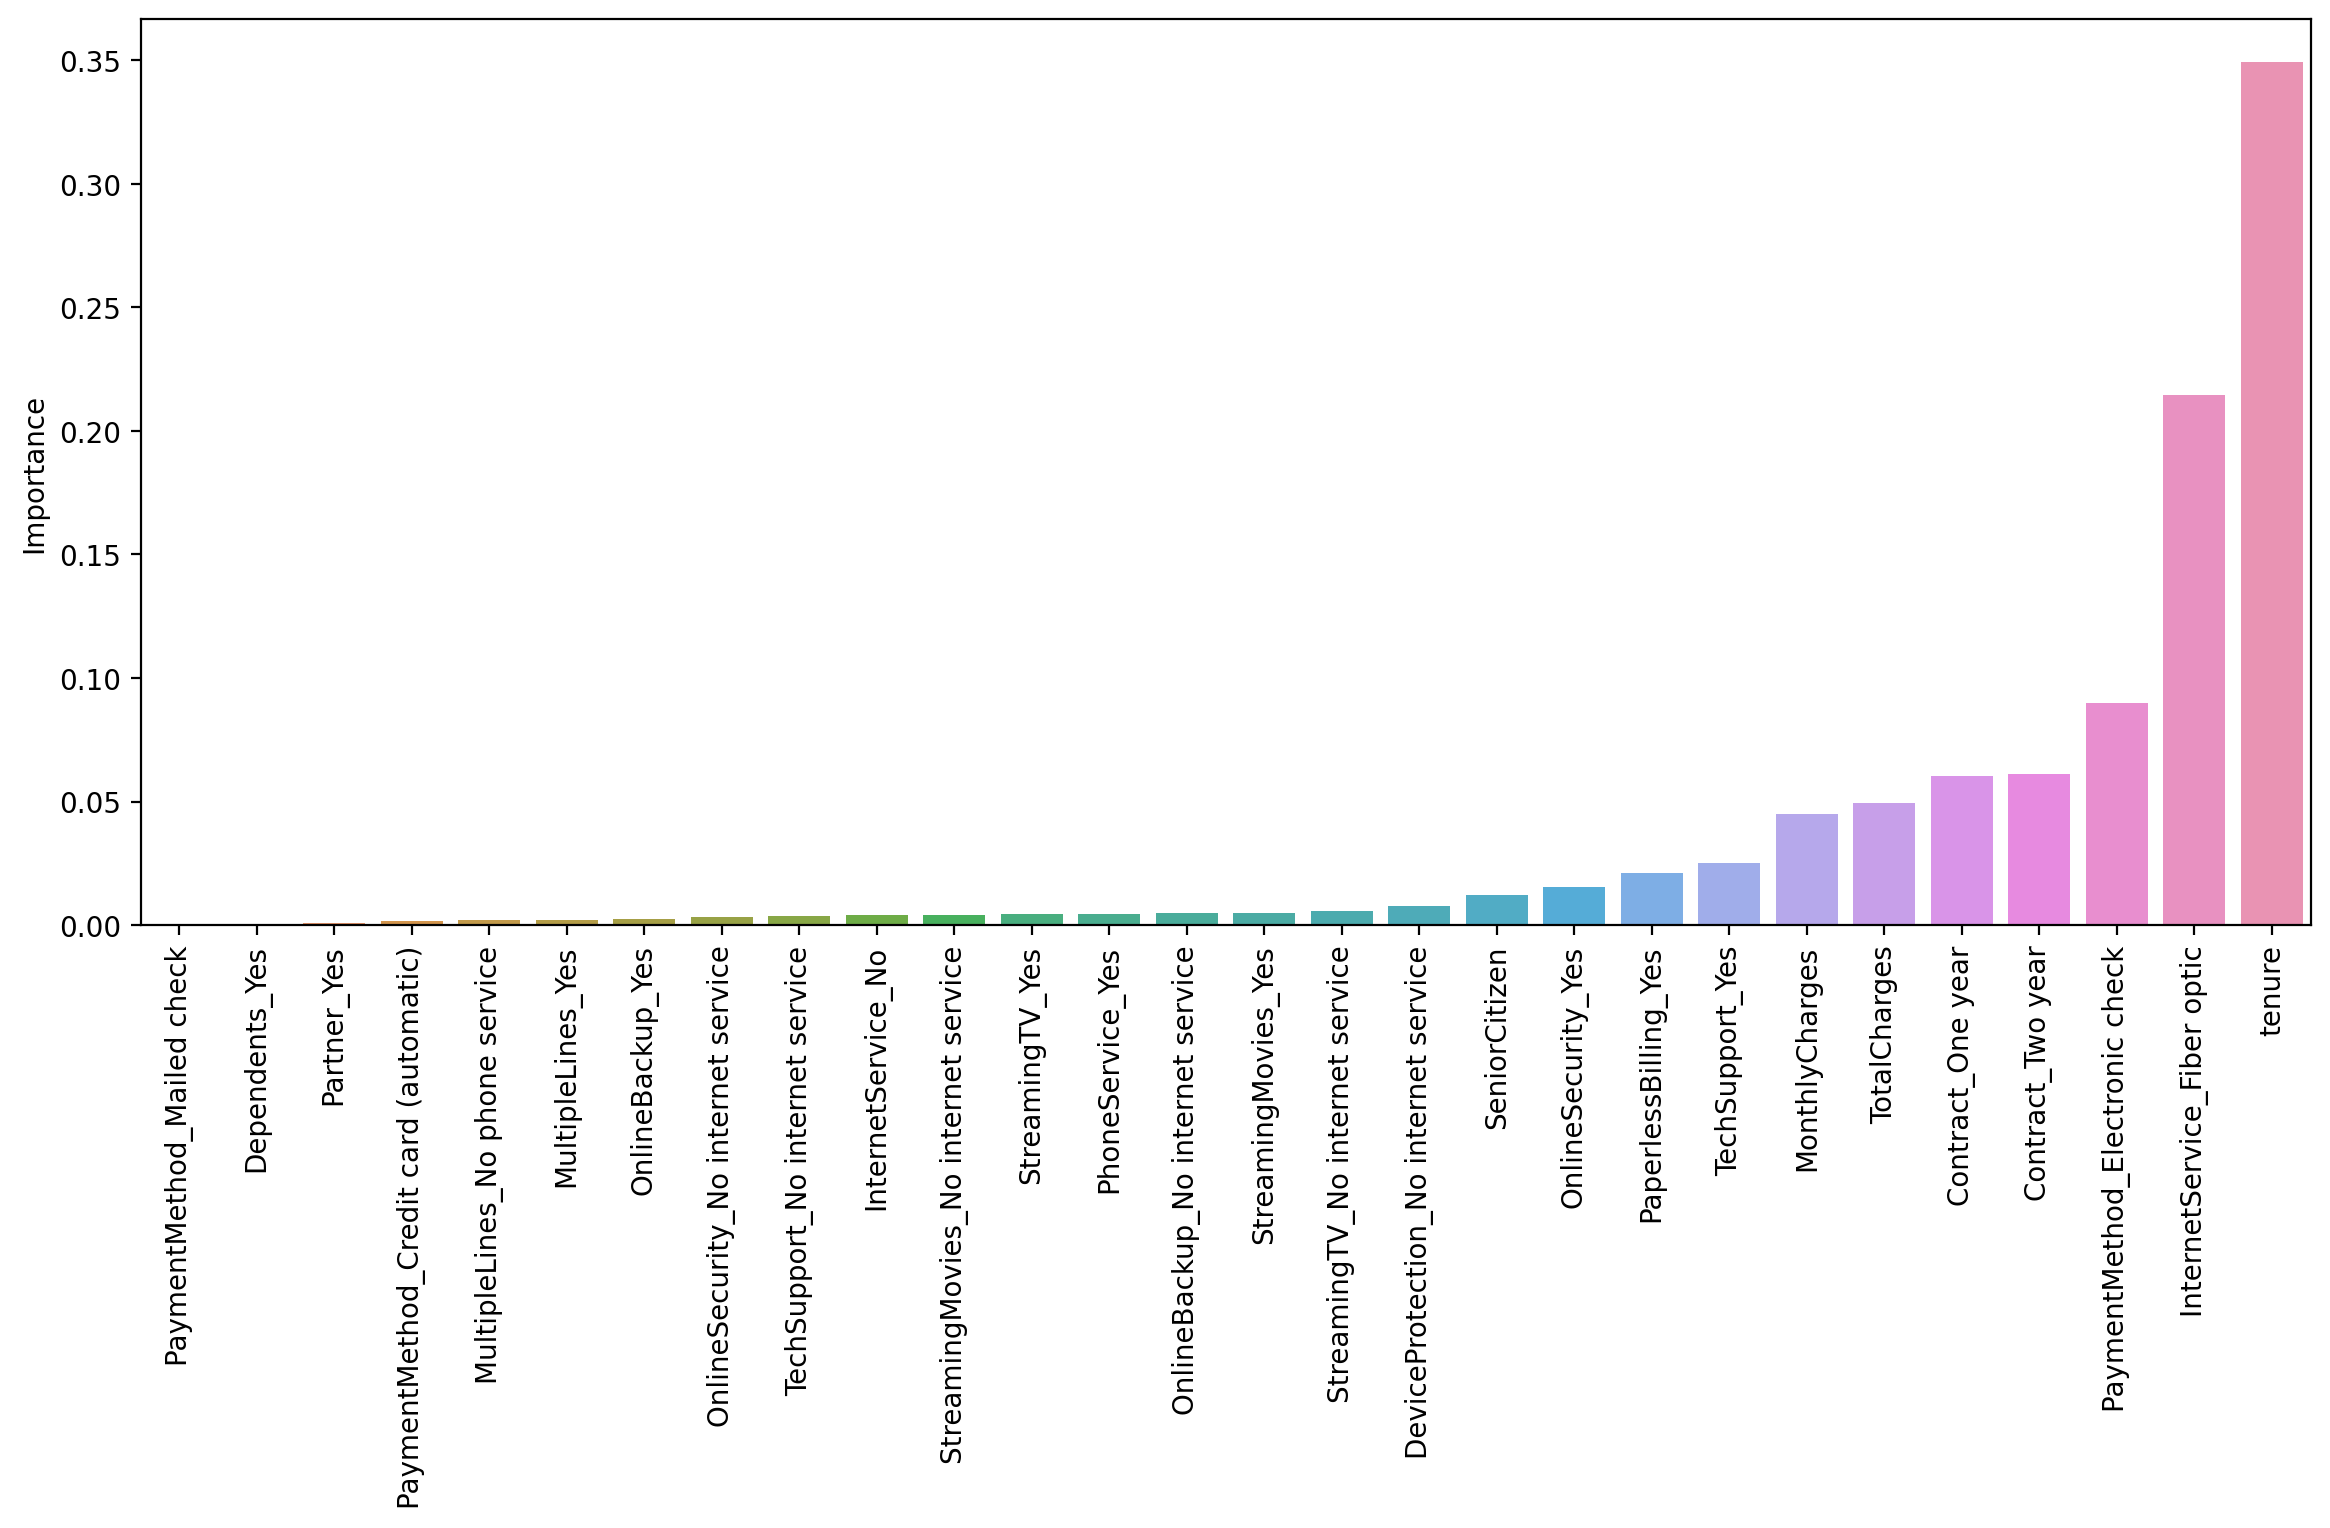

In [32]:
plt.figure(figsize=(14,6),dpi=200)
imp_feat = imp_feat[imp_feat['Importance']>0]
sns.barplot(data=imp_feat, x=imp_feat.index, y='Importance')
plt.xticks(rotation=90);

# AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(err)

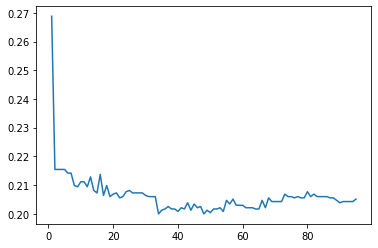

In [35]:
plt.plot(range(1,96),error_rates)

In [36]:
fin_model = AdaBoostClassifier(n_estimators=20)
fin_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20)

In [37]:
fin_predictions = fin_model.predict(X_test)
fin_predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [38]:
print(classification_report(y_test, fin_predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1697
           1       0.64      0.54      0.58       624

    accuracy                           0.79      2321
   macro avg       0.74      0.71      0.72      2321
weighted avg       0.78      0.79      0.79      2321



In [39]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])

In [40]:
imp_feats = feats[feats['Importance'] > 0].sort_values(by='Importance')

In [41]:
imp_feats

,Importance
SeniorCitizen,0.010526
PaperlessBilling_Yes,0.010526
Contract_Two year,0.010526
Contract_One year,0.010526
StreamingMovies_Yes,0.010526
TechSupport_Yes,0.010526
OnlineSecurity_Yes,0.010526
OnlineBackup_Yes,0.010526
MultipleLines_Yes,0.010526
PaymentMethod_Mailed check,0.010526


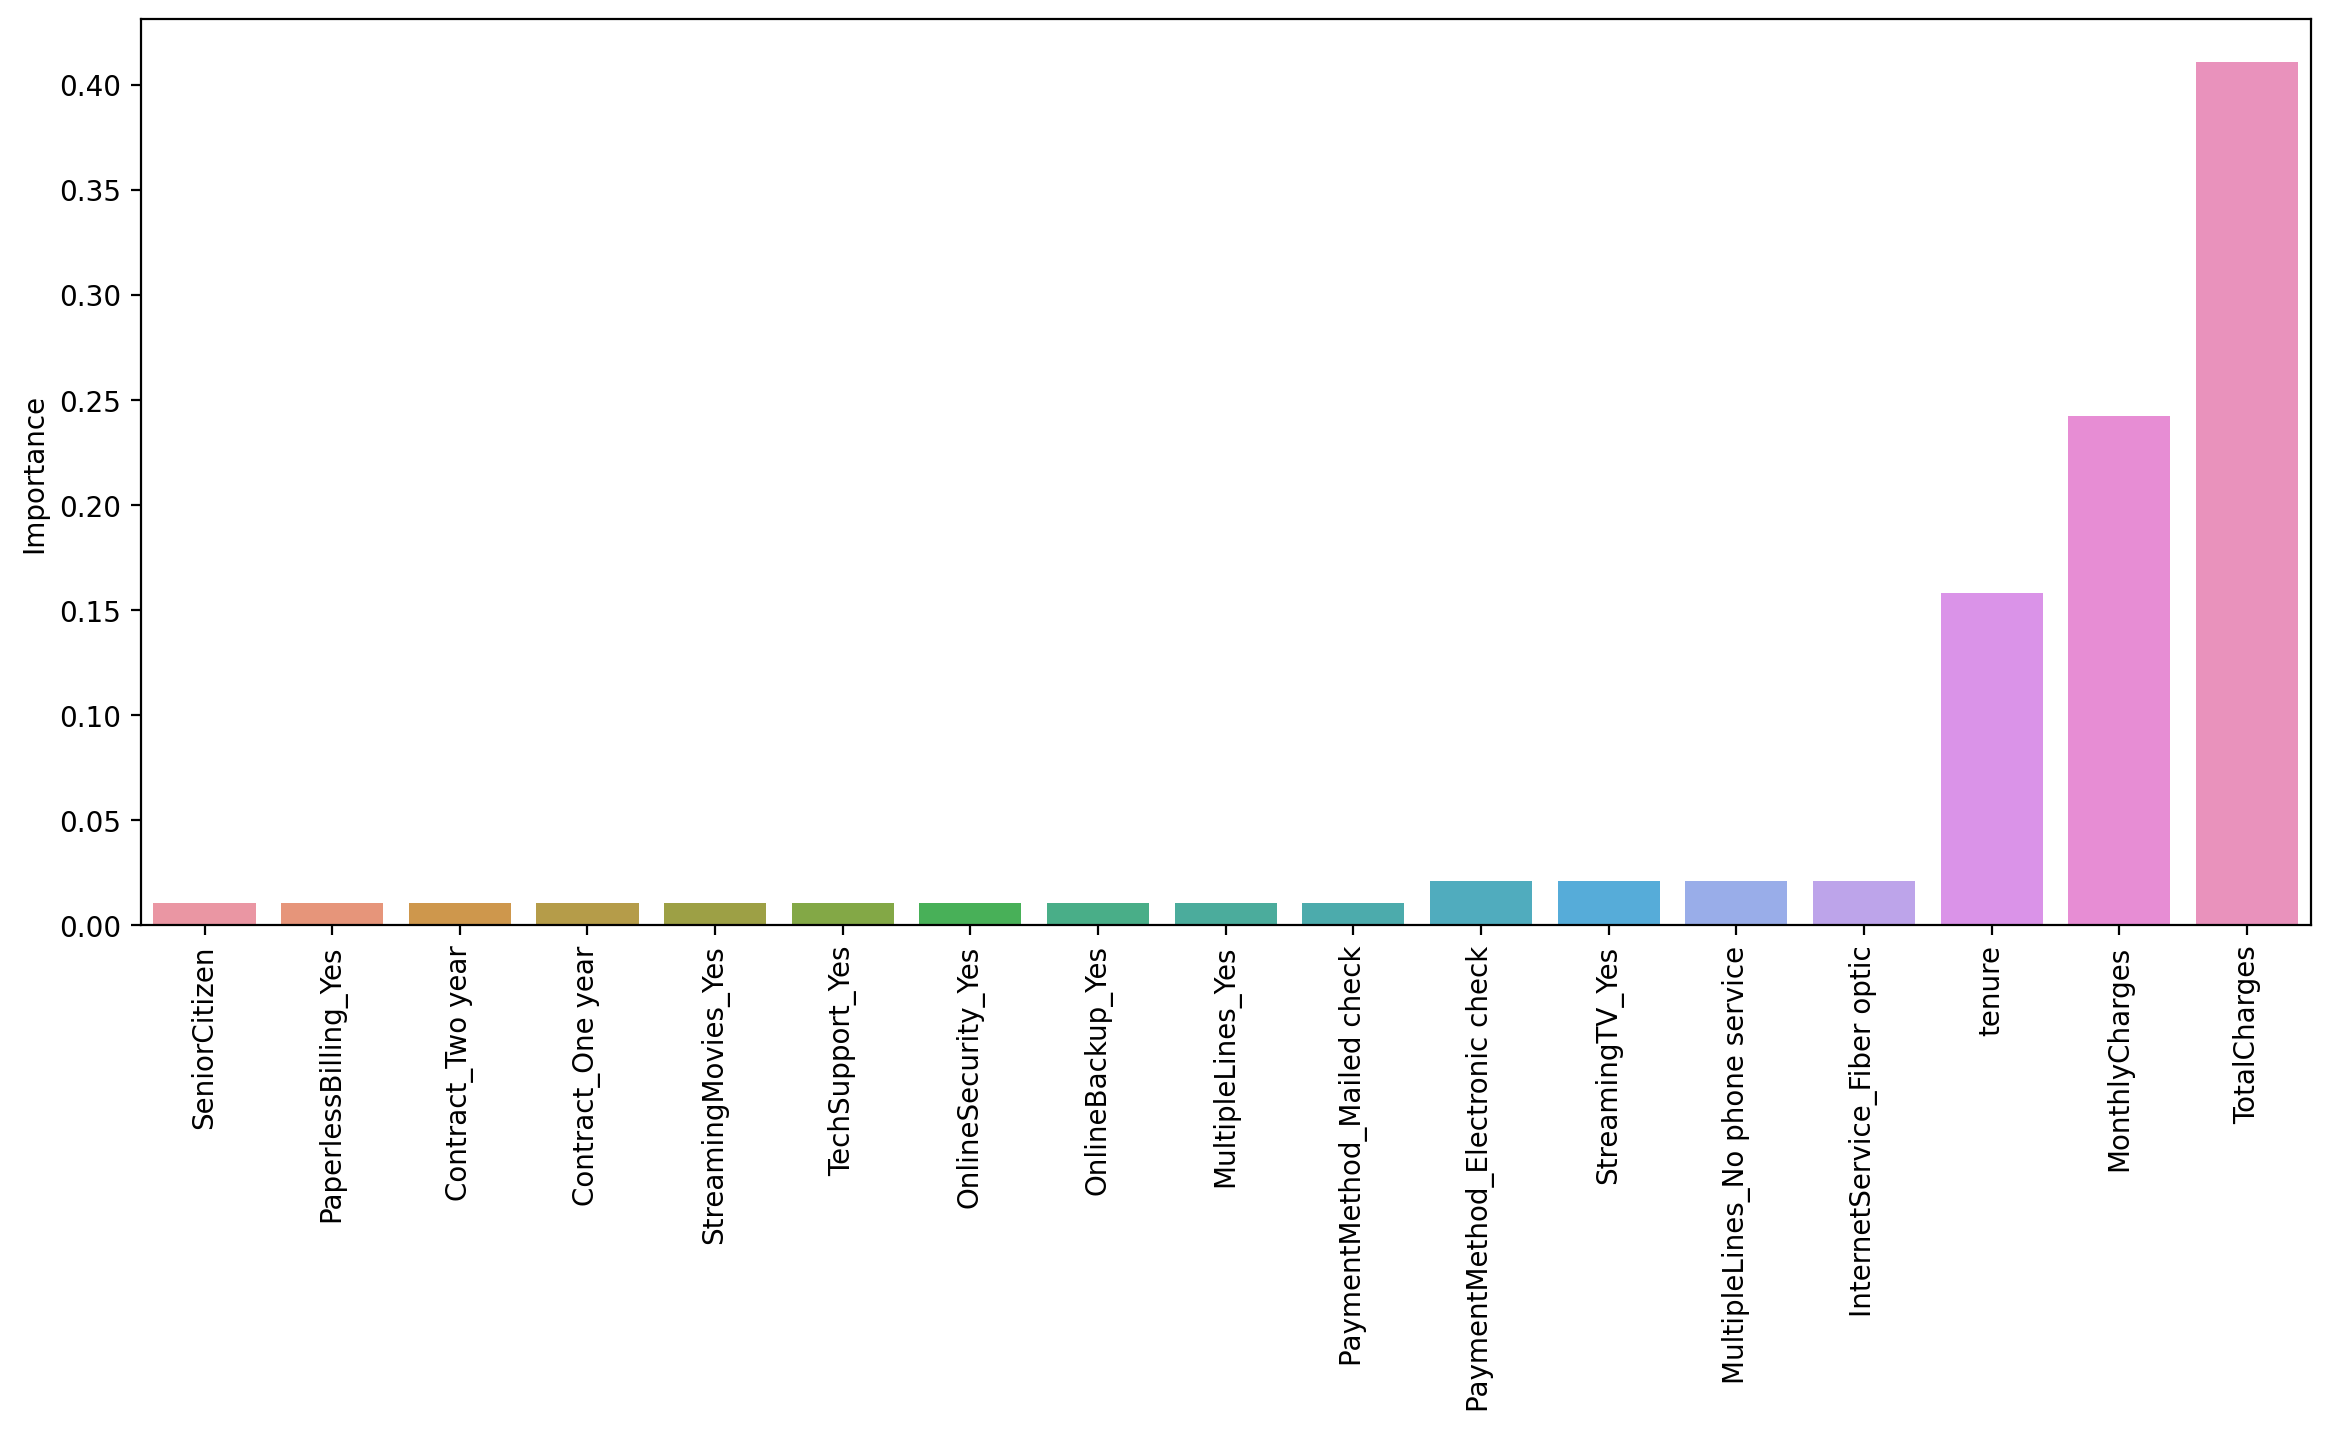

In [42]:
plt.figure(figsize=(14,6),dpi=200)
imp_feats = imp_feats[imp_feats['Importance']>0]
sns.barplot(data=imp_feats, x=imp_feats.index, y='Importance')
plt.xticks(rotation=90);

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf = RandomForestClassifier(max_depth=2)

In [45]:
clf.fit(X_test, y_test)

RandomForestClassifier(max_depth=2)

In [46]:
pred = clf.predict(X_test)

In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1697
           1       0.80      0.10      0.17       624

    accuracy                           0.75      2321
   macro avg       0.77      0.54      0.51      2321
weighted avg       0.76      0.75      0.67      2321



# ANN

In [48]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

nn = keras.Sequential()

nn.add(Dense(30, activation='relu'))

nn.add(Dropout(0.2))

nn.add(Dense(15, activation='relu'))

nn.add(Dropout(0.2))

nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=25)

nn.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 4711 samples, validate on 2321 samples
Epoch 1/1000
4711/4711 [==============================] - 2s 419us/sample - loss: 0.5058 - accuracy: 0.7453 - val_loss: 0.4494 - val_accuracy: 0.7729
Epoch 2/1000
4711/4711 [==============================] - 1s 140us/sample - loss: 0.4640 - accuracy: 0.7801 - val_loss: 0.4381 - val_accuracy: 0.7859
Epoch 3/1000
4711/4711 [==============================] - 1s 122us/sample - loss: 0.4490 - accuracy: 0.7882 - val_loss: 0.4327 - val_accuracy: 0.7902
Epoch 4/1000
4711/4711 [==============================] - 1s 122us/sample - loss: 0.4429 - accuracy: 0.7926 - val_loss: 0.4328 - val_accuracy: 0.7880
Epoch 5/1000
4711/4711 [==============================] - 1s 113us/sample - loss: 0.4330 - accuracy: 0.7913 - val_loss: 0.4281 - val_accuracy: 0.7919
Epoch 6/1000
4711/4711 [==============================] - 1s 125us/sample - loss: 0.4277 - accuracy: 0.8013 - val_loss: 0.4284 - val_accuracy: 0.7945
Epoch 7/1000
4711/4711 [============================

<AxesSubplot:>

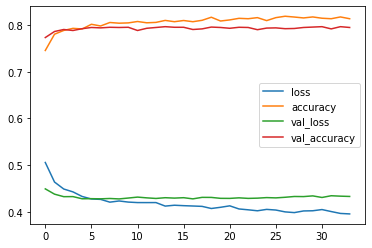

In [51]:
#plot the model loss

model_loss = pd.DataFrame(nn.history.history)
model_loss.plot()

In [52]:
predictions = nn.predict_classes(X_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1697
           1       0.65      0.51      0.57       624

    accuracy                           0.79      2321
   macro avg       0.74      0.70      0.72      2321
weighted avg       0.78      0.79      0.79      2321



In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[1528  169]
 [ 308  316]]
